In [1]:
import pandas as pd
import numpy as np

In [2]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

C:\Users\TARUN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [4]:
users.tail(2)

,User-ID,Location,Age
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [5]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [6]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
books.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

0

In [13]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


## Exploratory Data Analysis

In [14]:
ratings['Book-Rating'].mean()

2.8669501991685364

In [15]:
ratings['Book-Rating'].median()

0.0

In [16]:
ratings['Book-Rating'].max()

10

In [17]:
ratings['Book-Rating'].min()

0

In [18]:
ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [19]:
ratings['Book-Rating'].value_counts(normalize=True)*100

0     62.282263
8      9.022248
10     6.836960
7      6.649707
9      5.874254
5      4.433370
6      3.211397
4      0.774409
3      0.521491
2      0.239959
1      0.153942
Name: Book-Rating, dtype: float64

(array([716109.,   1770.,   2759.,   5996.,   8904.,  50974.,  36924.,
         76457., 103736., 146151.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

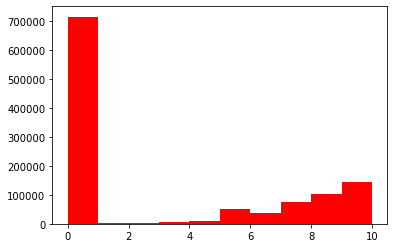

In [20]:
import matplotlib.pyplot as plt
plt.hist(ratings['Book-Rating'],color='Red')

<AxesSubplot:xlabel='Book-Rating', ylabel='Count'>

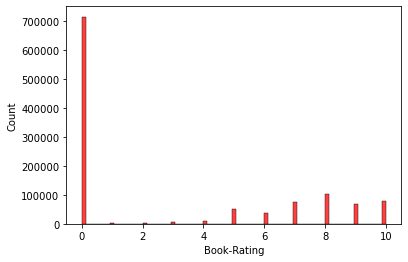

In [21]:
import seaborn as sns
sns.histplot(ratings['Book-Rating'],color='Red',)

In [22]:
len(ratings['User-ID'].unique())

105283

In [23]:
ratings.shape

(1149780, 3)

In [24]:
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [25]:
users.shape

(278858, 3)

In [26]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [27]:
books.shape

(271360, 8)

In [28]:
books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

# Popularity Based Recommendation System

##### Top 50 books of highest avg ratings but only those book which got minimum of 250 votes

In [29]:
ratings_with_name=ratings.merge(books,how='inner',on='ISBN')
ratings_with_name.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [30]:
ratings_with_name.groupby('Book-Title').count()

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Book-Title,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,4,4,4,4,4,4,4,4
Always Have Popsicles,1,1,1,1,1,1,1,1,1
Apple Magic (The Collector's series),1,1,1,1,1,1,1,1,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,1,1,1,1,1,1,1,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Ã?Â?lpiraten.,2,2,2,2,2,2,2,2,2
Ã?Â?rger mit Produkt X. Roman.,4,4,4,4,4,4,4,4,4
Ã?Â?sterlich leben.,1,1,1,1,1,1,1,1,1


In [31]:
ratings_with_name.groupby('Book-Title').count()['Book-Rating']

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    4
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
                                                                                                             ..
Ã?Â?lpiraten.                                                                                                 2
Ã?Â?rger mit Produkt X. Roman.                                                                                4
Ã?Â?sterlich leben.                                                                          

In [32]:
num_rating_df=ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [33]:
num_rating_df.rename(columns={"Book-Rating" : "num_rating"} ,inplace=True)

In [34]:
num_rating_df

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [35]:
avg_rating_df=ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [36]:
avg_rating_df.rename(columns={"Book-Rating" : "mean_rating"} ,inplace=True)
avg_rating_df

,Book-Title,mean_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [37]:
popularity_df=num_rating_df.merge(avg_rating_df ,on="Book-Title")
popularity_df

,Book-Title,num_rating,mean_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [38]:
filter = popularity_df['num_rating'] >= 250

filter_popularity_df = popularity_df[filter]

popular_df=filter_popularity_df.sort_values(by="mean_rating" ,ascending=False).head(50)

In [39]:
popular_df

,Book-Title,num_rating,mean_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [40]:
popular_df.merge(books , on='Book-Title')

,Book-Title,num_rating,mean_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...
...,...,...,...,...,...,...,...,...,...,...
191,Lord of the Flies,259,3.818533,0698102193,William G. Golding,1978,Putnam Pub Group,http://images.amazon.com/images/P/0698102193.0...,http://images.amazon.com/images/P/0698102193.0...,http://images.amazon.com/images/P/0698102193.0...
192,A Prayer for Owen Meany,413,3.796610,0345361792,John Irving,1990,Ballantine Books,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...
193,A Prayer for Owen Meany,413,3.796610,0345363523,John Irving,1989,Ballantine Books,http://images.amazon.com/images/P/0345363523.0...,http://images.amazon.com/images/P/0345363523.0...,http://images.amazon.com/images/P/0345363523.0...
194,"The Vampire Lestat (Vampire Chronicles, Book II)",301,3.777409,0345313860,ANNE RICE,1986,Ballantine Books,http://images.amazon.com/images/P/0345313860.0...,http://images.amazon.com/images/P/0345313860.0...,http://images.amazon.com/images/P/0345313860.0...


In [41]:
popular_new_df=popular_df.merge(books , on='Book-Title').drop_duplicates('Book-Title')

In [42]:
popular_new_df.shape

(50, 10)

In [99]:
final_popular_df=popular_new_df[['Book-Title' ,'Book-Author' ,'num_rating' ,'mean_rating' ,'Image-URL-M']]

In [100]:
final_popular_df

,Book-Title,Book-Author,num_rating,mean_rating,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.852804,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.824289,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,278,5.737410,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,347,5.501441,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,5.183453,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,281,5.007117,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,368,4.948370,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,575,4.895652,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,260,4.880769,http://images.amazon.com/images/P/0345339711.0...
39,To Kill a Mockingbird,Harper Lee,510,4.700000,http://images.amazon.com/images/P/0446310786.0...


In [101]:
#final_popular_df["Image-URL-M"][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# Collaberative Filtering Based Recommender System

In [45]:
# we have to consider those books upon which minmum 50 ratings are given
# also we have to consider those users who are given atleast 200 rating

##### users who are given atleast 200 rating

In [46]:
ratings_with_name=ratings.merge(books,how='inner',on='ISBN')
ratings_with_name.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [47]:
ratings_with_name.groupby('User-ID').count()

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
User-ID,,,,,,,,,
2,1,1,1,1,1,1,1,1,1
8,17,17,17,17,17,17,17,17,17
9,3,3,3,3,3,3,3,3,3
10,1,1,1,1,1,1,1,1,1
12,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
278846,1,1,1,1,1,1,1,1,1
278849,4,4,4,4,4,4,4,4,4
278851,23,23,23,23,23,23,23,23,23


In [48]:
ratings_with_name.groupby('User-ID').count()['Book-Rating']

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

In [49]:
filter_200 = ratings_with_name.groupby('User-ID').count()['Book-Rating'] >200
filter_200

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [50]:
filter_200[filter_200]

User-ID
254       True
2276      True
2766      True
2977      True
3363      True
          ... 
274308    True
275970    True
277427    True
277639    True
278418    True
Name: Book-Rating, Length: 811, dtype: bool

In [51]:
#filter_200[filter_200==True]

In [52]:
valuable_user=filter_200[filter_200].index
valuable_user

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [53]:
ratings_with_name['User-ID'].isin(valuable_user)

0          False
1          False
2           True
3          False
4          False
           ...  
1031131    False
1031132    False
1031133    False
1031134    False
1031135    False
Name: User-ID, Length: 1031136, dtype: bool

In [54]:
filtered_rating=ratings_with_name[  ratings_with_name['User-ID'].isin(valuable_user)  ]

In [55]:
ratings.shape

(1149780, 3)

In [56]:
ratings_with_name.shape

(1031136, 10)

In [57]:
filtered_rating.shape

(474007, 10)

In [58]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


##### books upon which minmum 50 ratings

In [59]:
filtered_rating.groupby('Book-Title').count()

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Book-Title,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2,2,2,2,2,2,2,2,2
Always Have Popsicles,1,1,1,1,1,1,1,1,1
Apple Magic (The Collector's series),1,1,1,1,1,1,1,1,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,1,1,1,1,1,1,1,1
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Ã?Â?ber das Fernsehen.,2,2,2,2,2,2,2,2,2
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.,3,3,3,3,3,3,3,3,3
Ã?Â?lpiraten.,1,1,1,1,1,1,1,1,1


In [60]:
#filtered_rating.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [61]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating'] >=50
y

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
Ã?Â?ber das Fernsehen.                                                                                        False
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           False
Ã?Â?lpiraten.                                                

In [62]:
famous_book=y[y].index
famous_book

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [63]:
filtered_rating['Book-Title'].isin(famous_book)

2          False
5          False
7          False
15         False
16         False
           ...  
1030883    False
1030884    False
1030885    False
1030886    False
1030887    False
Name: Book-Title, Length: 474007, dtype: bool

In [64]:
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_book)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [65]:
final_ratings.duplicated().sum()

0

In [66]:
pt=final_ratings.pivot_table( index='Book-Title' ,columns='User-ID' ,values='Book-Rating') 

In [67]:
pt.shape

(706, 810)

In [68]:
pt.fillna(0, inplace=True)

In [69]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.metrics.pairwise import cosine_similarity

In [71]:
similarity_scores = cosine_similarity(pt)

In [72]:
similarity_scores.shape

(706, 706)

In [73]:
#similarity_scores[0]
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [74]:
def recommend(book_name):
    #index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list( enumerate(similarity_scores[index] )), key=lambda x:x[1] ,reverse=True )[1:6]
    
    for i  in similar_items:
        print(pt.index[i[0]])

In [75]:
recommend('Zoya')

Fine Things
Secrets
Kaleidoscope
Exclusive
Five Days in Paris


In [76]:
#np.where(pt.index=='4 Blondes')

In [77]:
#np.where(pt.index=='Zoya')[0][0]

In [78]:
#distance=similarity_scores[704]
#distance

In [79]:
#enumerate(similarity_scores[704])

In [80]:
#list(enumerate(similarity_scores[704]))

In [81]:
#sorted( list(enumerate(similarity_scores[704])) , key=lambda x:x[1])

In [82]:
#sorted( list(enumerate(similarity_scores[704])) , key=lambda x:x[1] ,reverse=True )

In [83]:
#sorted( list(enumerate(similarity_scores[704])) , key=lambda x:x[1] ,reverse=True ) [1:6]

In [84]:
#sorted( list(enumerate(similarity_scores[704])) , key=lambda x:x[1] ,reverse=True ) [1:6][0][0]

In [85]:
#sorted( list(enumerate(similarity_scores[704])) , key=lambda x:x[1] ,reverse=True ) [1:6][1][0]

In [86]:
#pt.index[ sorted( list(enumerate(similarity_scores[704])) , key=lambda x:x[1] ,reverse=True ) [1:6][0][0]]

In [87]:
#recommend('Message in a Bottle')

In [88]:
#recommend('The Notebook')

In [89]:
#recommend('1984')

In [90]:
#recommend('Animal Farm')

In [91]:
#recommend('The Da Vinci Code')

In [92]:
#recommend('The Hobbit : The Enchanting Prelude to The Lord of the Rings')

In [93]:
#recommend('The Fellowship of the Ring (The Lord of the Rings, Part 1)')

In [94]:
#recommend('Harry Potter and the Chamber of Secrets (Book 2)')

In [102]:
import pickle

In [103]:
pickle.dump(final_popular_df,open('popular.pkl','wb'))

In [121]:
def recommend_book(book_name):
    #index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list( enumerate(similarity_scores[index] )), key=lambda x:x[1] ,reverse=True )[1:6]
    
    data=[]
    
    for i  in similar_items:
        item = []
        temp_df = books[  books['Book-Title'] == pt.index[i[0]]  ]
        item.extend(list(temp_df.drop_duplicates('Book-Title') ['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title') ['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title') ['Image-URL-M'].values))
        
        data.append(item)
        
    return data
        
recommend_book('Zoya')

[['Fine Things',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440200563.01.MZZZZZZZ.jpg'],
 ['Secrets',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440176484.01.MZZZZZZZ.jpg'],
 ['Kaleidoscope',
  'June Stepansky',
  'http://images.amazon.com/images/P/0884092097.01.MZZZZZZZ.jpg'],
 ['Exclusive',
  'Sandra Brown',
  'http://images.amazon.com/images/P/0446604232.01.MZZZZZZZ.jpg'],
 ['Five Days in Paris',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440222842.01.MZZZZZZZ.jpg']]

In [122]:
recommend_book('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [123]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))